In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
%matplotlib tk

## Q1 Stiff ODE solve
Given the following differential equation:
$$ \frac{dy}{dt} = 5.0y - 5t^{2} ,  y(0) = 2/25 $$
This equation is of the form:
$$\frac{dy}{dt} + Py = Q $$
where P and Q are functions of t only. TO solve this ODE we use the Integrating factor of the form:

$$ e^{\int Pdt} $$
The solution to the equation then would be:
$$ye^{\int Pdt} = \int Qe^{\int Pdt} dt  + C$$
In our case $e^{\int Pdt}$ is $e^{-5t}$. Therefore the solution is of the form:
$$y = t^{2} + \frac{2t}{5} + \frac{2}{25} $$
which is a parabolic equation.

## Analytical Solutions for different grid points:


In [2]:
N = [25,250,2500]   # Number of grids for the given ODE
y_ana_25 = []       # Individual arrays for the anayltical values
y_ana_250 = []
y_ana_2500 = []
for i in N:         # for every grid point calculating analytical values
    t = np.linspace(0,2,i)
    if i == 25:
        y_25 = t**2 + (2*t / 5) + (2/25)
        y_ana_25.extend(y_25)             #for me: extend actually appends the individual element of the array rather than array itself. try append if confused.
    elif i == 250:
        y_250 = t**2 + (2*t / 5) + (2/25)
        y_ana_250.extend(y_250)
    else:
        y_2500 = t**2 + (2*t / 5) + (2/25)
        y_ana_2500.extend(y_2500)
    


## Euler method
Euler algorithm:
$$y_{i+1} = y_{i} + dt f(y_{i},t_{i}) $$
where $f(y,t) = 5y - 5t^{2} $ 

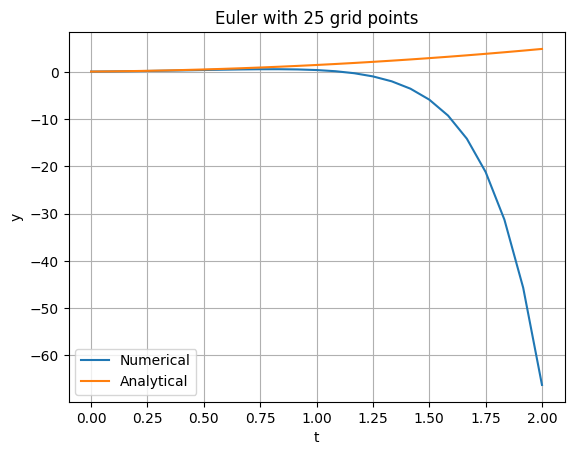

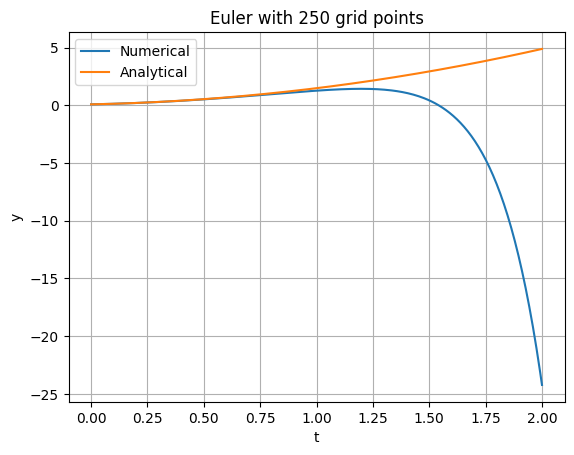

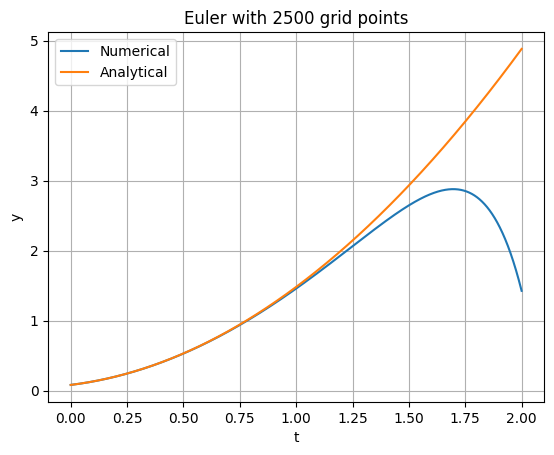

In [3]:
%matplotlib inline
def f(a,b):              #defining function for the euler method. a here represents y, b represents t
    return 5*a - 5*b**2

N = [25,250,2500]  #Grid point setup

for j in N:                                 
    if j == 25:
        t_25 = np.linspace(0,2,j)
        dt_25 = t_25[1] - t_25[0]
        y_euler_25 = [2/25]
        #Euler algorithm here
        for i in range(j-1):
            C = y_euler_25[i] + dt_25*f(y_euler_25[i],t_25[i])
            y_euler_25.append(C)
    if j == 250:
        t_250 = np.linspace(0,2,j)
        dt_250 = t_250[1] - t_250[0]
        y_euler_250 = [2/25]
        for i in range(j-1):
            D = y_euler_250[i] + dt_250*f(y_euler_250[i],t_250[i])
            y_euler_250.append(D)
    if j == 2500:
        t_2500 = np.linspace(0,2,j)
        dt_2500 = t_2500[1] - t_2500[0]
        y_euler_2500 = [2/25]
        for i in range(j-1):
            F = y_euler_2500[i] + dt_2500*f(y_euler_2500[i],t_2500[i])
            y_euler_2500.append(F)

# Comments for above code: first loop initializes the size of grid point. Using conditions to calculate values of y using euler for respective grid size.

# PLotting all the numerical solutions with respect to anaylatical solutions
plt.title('Euler with 25 grid points')
plt.plot(t_25,y_euler_25,label = 'Numerical')
plt.plot(t_25,y_ana_25,label = 'Analytical' )
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('Euler with 250 grid points')
plt.plot(t_250,y_euler_250,label = 'Numerical')
plt.plot(t_250,y_ana_250,label = 'Analytical')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('Euler with 2500 grid points')
plt.plot(t_2500,y_euler_2500,label = 'Numerical')
plt.plot(t_2500,y_ana_2500,label = 'Analytical')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


## RK2
algorithm for RK2:

$k_1 = hf(y_{i},t_{i})$ \
$k_2 = hf(y_{n}+k1, t_{i} + h)$ \
Which then gives, 

$y_{i+1} = y_{i} + \frac{(k_{1} + k_{2})}{2} $

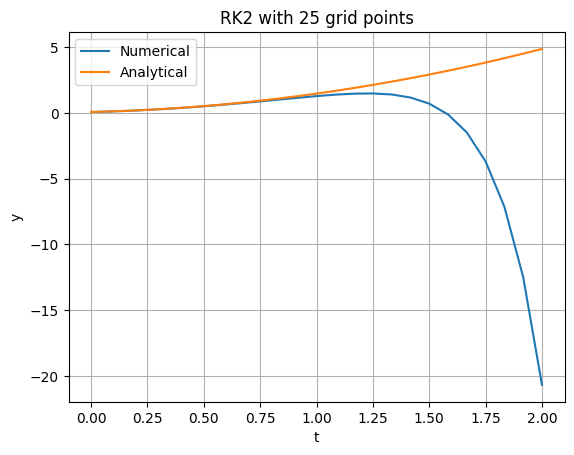

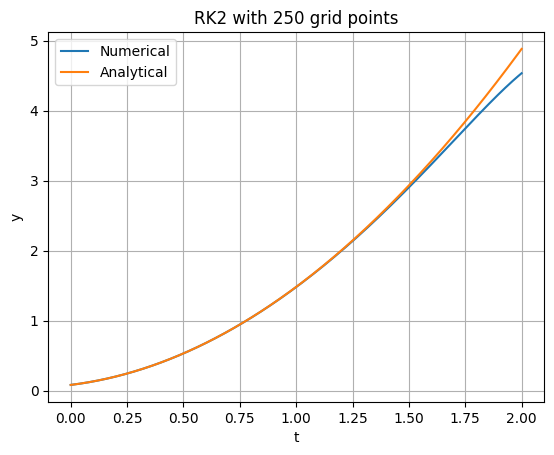

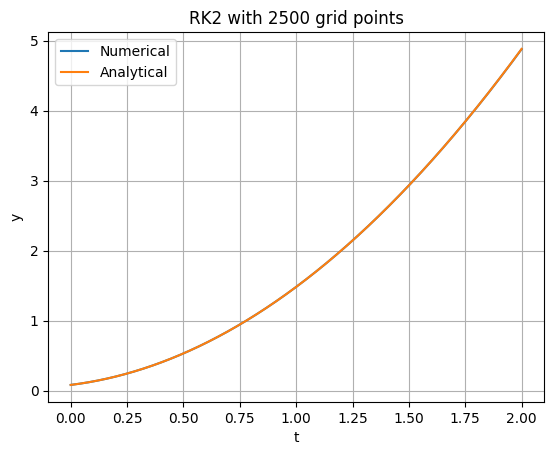

In [4]:
%matplotlib inline
def f(a, b):              
    return 5*a - 5*b**2

N = [25, 250, 2500]

# Looping through different grid points as usual
for j in N:                                 
    if j == 25:
        t_25 = np.linspace(0, 2, j)
        dt_25 = t_25[1] - t_25[0]
        y_rk2_25 = [2/25]
        
        #  RK2 method starts here
        for i in range(j-1):
            k1 = dt_25 * f(y_rk2_25[i], t_25[i])
            k2 = dt_25 * f(y_rk2_25[i] + 0.5*k1, t_25[i] + 0.5*dt_25)
            C = y_rk2_25[i] + k2
            y_rk2_25.append(C)
            
    elif j == 250:
        t_250 = np.linspace(0, 2, j)
        dt_250 = t_250[1] - t_250[0]
        y_rk2_250 = [2/25]
        for i in range(j-1):
            k1 = dt_250 * f(y_rk2_250[i], t_250[i])
            k2 = dt_250 * f(y_rk2_250[i] + 0.5*k1, t_250[i] + 0.5*dt_250)
            D = y_rk2_250[i] + k2
            y_rk2_250.append(D)
            
    elif j == 2500:
        t_2500 = np.linspace(0, 2, j)
        dt_2500 = t_2500[1] - t_2500[0]
        y_rk2_2500 = [2/25]
        for i in range(j-1):
            k1 = dt_2500 * f(y_rk2_2500[i], t_2500[i])
            k2 = dt_2500 * f(y_rk2_2500[i] + 0.5*k1, t_2500[i] + 0.5*dt_2500)
            F = y_rk2_2500[i] + k2
            y_rk2_2500.append(F)

# Plotting results
plt.title('RK2 with 25 grid points')
plt.plot(t_25, y_rk2_25, label='Numerical')
plt.plot(t_25, y_ana_25, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('RK2 with 250 grid points')
plt.plot(t_250, y_rk2_250, label='Numerical')
plt.plot(t_250, y_ana_250, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('RK2 with 2500 grid points')
plt.plot(t_2500, y_rk2_2500, label='Numerical')
plt.plot(t_2500, y_ana_2500, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


## Backward Euler method
Algorithm:

$y_{i+1} = y_{i} + hf(x_{i+1},y_{i+1})$\
$y_{i+1} = y_{i} + h(5y_{i+1} - 5t_{i+1}^{2}) $\
$y_{i+1}(1 - 5h) = y_{i} - h5t_{i+1}^{2} $\
$y_{i+1} = \frac{y_{i} - h5t_{i+1}^{2}}{(1 - 5h)} $

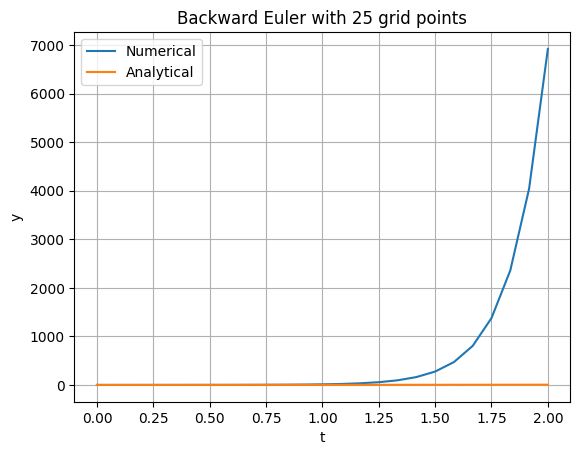

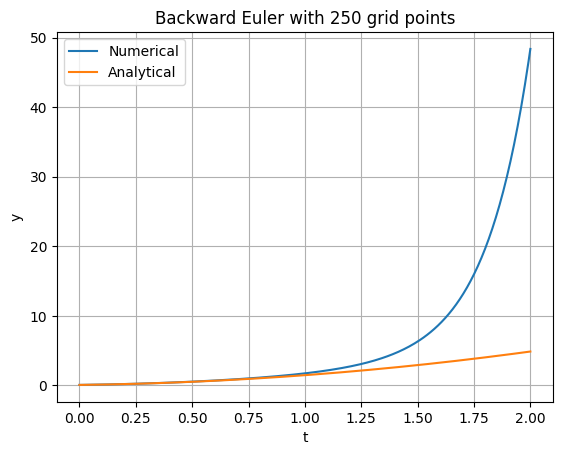

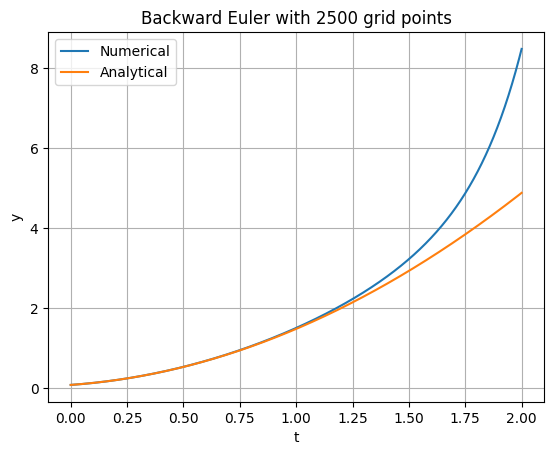

In [5]:
%matplotlib inline
def f(a, b):              
    return 5*a - 5*b**2

N = [25, 250, 2500]


for j in N:                                 
    if j == 25:
        t_25 = np.linspace(0, 2, j)
        dt_25 = t_25[1] - t_25[0]
        
        y_backward_euler_25 = [2/25]
        #Backward euler starts here
        for i in range(j-1):
            C = (y_backward_euler_25[i] - dt_25 * 5 * t_25[i+1]**2) / (1 - 5 * dt_25)
            y_backward_euler_25.append(C)
            
    elif j == 250:
        t_250 = np.linspace(0, 2, j)
        dt_250 = t_250[1] - t_250[0]
        y_backward_euler_250 = [2/25]
        for i in range(j-1):
            D = (y_backward_euler_250[i] - dt_250 * 5 * t_250[i+1]**2) / (1 - 5 * dt_250)
            y_backward_euler_250.append(D)
            
    elif j == 2500:
        t_2500 = np.linspace(0, 2, j)
        dt_2500 = t_2500[1] - t_2500[0]
        y_backward_euler_2500 = [2/25]
        for i in range(j-1):
            F = (y_backward_euler_2500[i] - dt_2500 * 5 * t_2500[i+1]**2) / (1 - 5 * dt_2500)
            y_backward_euler_2500.append(F)

# Plotting results
plt.title('Backward Euler with 25 grid points')
plt.plot(t_25, y_backward_euler_25, label='Numerical')
plt.plot(t_25, y_ana_25, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('Backward Euler with 250 grid points')
plt.plot(t_250, y_backward_euler_250, label='Numerical')
plt.plot(t_250, y_ana_250, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.title('Backward Euler with 2500 grid points')
plt.plot(t_2500, y_backward_euler_2500, label='Numerical')
plt.plot(t_2500, y_ana_2500, label='Analytical')  
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


# Q2

## Upwind Scheme



In [2]:
%matplotlib tk
def upwind_scheme(lamb):
    x = np.linspace(-10, 10, 200) 
    t = np.linspace(0, 25,1000)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
 # I am initializing the grid points and time steps to take


    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)  #Initial Gaussian function
    u_j = u_0.copy()                                 # A copy of initial function. I will be updating this array continuously to get the Gaussian moving

    fig, ax = plt.subplots()                         # Initializing the animation here. (for myself: if feel confused try the matplotlib documentation)
    line, = ax.plot(x, u_0)                          # initializing the graph here 
    ax.set_xlabel("x")
    ax.set_ylabel("Function")    
    ax.set_title(f" Upwind scheme at convective speed = {lamb}")

    def update(frame):
        u = u_j.copy()                              #Another copy of the main array. I will take the initial values from here and update the main uj.
        for j in range(0, len(x)):
            if lamb>0:
                u_j[j] = u[j] - (lamb * (dt / dx) * (u[(j) % 200] - u[(j-1) % 200]))   #Here updating uj again and again from the copy of uj that is u.
            else:
                u_j[j] = u[j] - (lamb * (dt / dx) * (u[(j+1) % 200] - u[(j) % 200])) # Modulo here because I want to use the previous values ie ghost cells as discussed in class
            
        line.set_ydata(u_j)
        if lamb>3:
            ax.set_ylim(np.min(u_j), np.max(u_j))                                                      
        return line,                        #just for animation returning. 

    animation = FuncAnimation(fig, update, frames=len(t), interval=50)  #Final animation happening here
    return animation,plt.show()




#animation.save('upwind_lambda_3.gif', writer='pillow')


## Upwind scheme condition:
if $\lambda $ = positive then use:
$$u_{i}^{n+1} = u_{i}^{n} - \lambda \frac{\Delta t}{\Delta x} \left(\frac{u_{i} - u_{i-1}}{\Delta x} \right) $$
if $\lambda $ = negattive then use:
$$u_{i}^{n+1} = u_{i}^{n} - (-\lambda) \frac{\Delta t}{\Delta x} \left(\frac{u_{i+1} - u_{i}}{\Delta x} \right) $$

In [3]:
upwind_scheme(-3) #intake of advection speed, output gives animation

(<matplotlib.animation.FuncAnimation at 0x2142a1eae90>, None)

In [23]:
upwind_scheme(3)

(<matplotlib.animation.FuncAnimation at 0x204d215c390>, None)

In [22]:
upwind_scheme(10)

(<matplotlib.animation.FuncAnimation at 0x204d20800d0>, None)

## Central Difference

$$u_{i}^{n+1} = u_{i}^{n} - \lambda \frac{\Delta t}{2\Delta x} \left(\frac{u_{i} - u_{i-1}}{\Delta x} \right) $$

In [24]:
def central_scheme(lamb):
    x = np.linspace(-10,10,200)
    t = np.linspace(0,25,1000)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u_0 =  (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0)
    ax.set_ylim(0, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("Function")    
    ax.set_title(f"Central difference scheme $\lambda$ = {lamb} ")

    u_j = u_0.copy()
    def update(frames):
        u = u_j.copy()
        for j in range(0,len(x)):
            u_j[j] = u[j] - ( (lamb*dt/(2*dx)) * (u[(j+1)%200] - u[(j-1)%200]))  # same code as upwind but just indices change
        line.set_ydata(u_j)
        ax.set_ylim(np.min(u_j), np.max(u_j))
        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()
#animation.save('central difference,3.gif', writer='pillow')    

In [25]:
central_scheme(3)

(<matplotlib.animation.FuncAnimation at 0x204d2c21190>, None)

In [26]:
central_scheme(-3)

(<matplotlib.animation.FuncAnimation at 0x204d2c81190>, None)

In [27]:
central_scheme(10)

(<matplotlib.animation.FuncAnimation at 0x204d2cfb4d0>, None)

## Lax method
$$ u_i^{n+1} = \frac{1}{2} (u_{i-1}^n + u_{i+1}^n) - \lambda \left( \frac{\Delta t}{2 \Delta x} \right) (u_{i+1}^n - u_{i-1}^n)$$

In [28]:
def lax_method(lamb):
    # For lambda  = 3
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,1000)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Lax method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u_j.copy()
        for i in range(0,len(x)):
            u_j[i] = (un[(i - 1) % 200] + un[(i + 1) % 200]) / 2 -  (lamb)* (dt / (2 * dx)) * (un[(i + 1) % 200] - un[(i - 1) % 200]) # algorithm here
        line.set_ydata(u_j)

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()



#animation.save('Lax method 3.gif', writer='pillow')

In [30]:
lax_method(-3)

(<matplotlib.animation.FuncAnimation at 0x204d170ee50>, None)

In [31]:
lax_method(3)

(<matplotlib.animation.FuncAnimation at 0x204d10b7490>, None)

In [ ]:
lax_method(10)

## Lax wenderoff scheme
$$ u_i^{n+1} = u_i^n - \lambda \left( \frac{\Delta t}{2 \Delta x} \right) (u_{i+1}^n - u_{i-1}^n) + \left( \frac{\lambda^2 \Delta t^2}{2 \Delta x^2} \right) (u_{i+1}^n - 2u_i^n + u_{i-1}^n)  $$


In [28]:
def lax_wenderoff(lamb):
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,10000)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Lax wenderoff, $\lambda $ = {lamb} ")

    def update(frame):
        u = u_j.copy()
        for i in range(0,len(x)):
            u_j[i] = u[i] - lamb * (dt / (2 * dx)) * (u[(i + 1) % 200] - u[(i - 1) % 200]) + (lamb ** 2 * dt ** 2 / (2 * dx ** 2)) * (u[(i + 1) % 200] - 2 * u[i] + u[(i - 1) % 200])
        line.set_ydata(u_j)
        ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return  animation, plt.show()




In [ ]:
lax_wenderoff(3)

In [29]:
lax_wenderoff(-3)


(<matplotlib.animation.FuncAnimation at 0x2771a0997d0>, None)

In [30]:
lax_wenderoff(10)

(<matplotlib.animation.FuncAnimation at 0x2771a991210>, None)

## Mac cormack
1. Predictor Step
$$ u_{\text{int}}[i] = u^n[i] - \lambda \left( \frac{\Delta t}{\Delta x} \right) \left( u^n[i+1] - u^n[i] \right) $$
2. Corrector Step
$$u[i] = \frac{1}{2} \left( u^n[i] + u_{\text{int}}[i] \right) - c \left( \frac{\Delta t}{\Delta x} \right) \left( u_{\text{int}}[i] - u_{\text{int}}[i-1] \right) $$


In [21]:
def mac_Cormack(lamb):
    
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,10000)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Maccormak method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u_j.copy()
        u_p = u_j.copy()
        for i in range(0,len(x)):

            #Same as upwind so the condition applies here
            if lamb > 0:
                u_p[i] = un[i] - lamb * (dt / dx) * (un[(i) % 200] - un[(i - 1) % 200])  # Predictor step.
            else:
                u_p[i] = un[i] + abs(lamb) * (dt / dx) * (un[(i + 1) % 200] - un[i])         
        for i in range(0,len(x)):
            if lamb > 0:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[i] - u_p[(i - 1) % 200])      
            else:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[(i + 1) % 200] - u_p[(i) % 200]) # Corrector step.

    
        line.set_ydata(u_j)
        ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()


In [22]:
mac_Cormack(10) # The function takes values of lambda and the plots it

(<matplotlib.animation.FuncAnimation at 0x22e6c7961d0>, None)

In [23]:
mac_Cormack(3)

(<matplotlib.animation.FuncAnimation at 0x22e6c7e46d0>, None)

In [9]:
mac_Cormack(-3)

(<matplotlib.animation.FuncAnimation at 0x22e6a067cd0>, None)

# Second part of the question
varying the time steps for lax wenderoff methods

In [2]:
def lax_wenderoff_2(lamb,time_steps):
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,time_steps)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)
    u_l = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Lax wenderoff, $\lambda $ = {lamb} , time step $\Delta t$ = {25/time_steps} ")

    def update(frame):
        u = u_l.copy()
        for i in range(0,len(x)):
            u_l[i] = u[i] - lamb * (dt / (2 * dx)) * (u[(i + 1) % 200] - u[(i - 1) % 200]) + (lamb ** 2 * dt ** 2 / (2 * dx ** 2)) * (u[(i + 1) % 200] - 2 * u[i] + u[(i - 1) % 200])
        line.set_ydata(u_l)
        ax.set_ylim(np.min(u_l), np.max(u_l))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return  animation, plt.show()




In [4]:
lax_wenderoff_2(3,2500)

(<matplotlib.animation.FuncAnimation at 0x204caae6350>, None)

In [3]:
lax_wenderoff_2(3,250)

(<matplotlib.animation.FuncAnimation at 0x204c97a3150>, None)

In [5]:
lax_wenderoff_2(3,250000)

(<matplotlib.animation.FuncAnimation at 0x204cce9b4d0>, None)

## Conclusion
As we increase the time step, the Gaussian wave stabilizes!

 the CFL conditions are met when the :
$$\frac{\Delta t \lambda}{\Delta x} \leq 1  $$ 
so when we take $\Delta t = 0.1$ ie 250 t steps we have:
$$ \frac{0.1 *3 }{0.1} = CFL => 3 = CFL$$
This means the gaussian will be unstable.
Similarly, for $\Delta t = 0.01$ and $\Delta t = 0.0001$ , $ \textbf{CFL is 0.3 and 0.003}$ respectively. Which means the gaussian would become stable.


## Rectangular wave
Similarly the CFL conditions  for this wave would be:
$$\frac{\Delta t \lambda}{\Delta x} \leq 1  $$ 
1. $\Delta t = 0.1$, CFL = 3
2. $\Delta t = 0.01$, CFL = 0.3
3. $\Delta t = 0.0001$, CFL = 0.003

SO pulse should be stable for 2nd and 3rd condition. Although the oscilllations at edge would still be present.



In [15]:
def mac_Cormack_2(lamb,step_size):
    
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,step_size)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    pulse_height = 3.0
    pulse_width = 8.0
    u_0 = np.where((np.abs(x) <= pulse_width / 2), pulse_height, 0)
    
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Maccormak method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u_j.copy()
        u_p = u_j.copy()
        for i in range(0,len(x)):

            #Same as upwind so the condition applies here
                u_p[i] = un[i] - lamb * (dt / dx) * (un[(i) % 200] - un[(i + 1) % 200])  # Predictor step.         
        for i in range(0,len(x)):
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[(i-1)%200] - u_p[(i) % 200])     # Corrector step 
    
        line.set_ydata(u_j)
        ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()


In [16]:
mac_Cormack_2(-3,2500)

(<matplotlib.animation.FuncAnimation at 0x22e6ab91210>, None)

In [16]:
mac_Cormack_2(-3,250)

(<matplotlib.animation.FuncAnimation at 0x2df870c7250>, None)

In [18]:
mac_Cormack_2(-3,25000)

(<matplotlib.animation.FuncAnimation at 0x2df892612d0>, None)

def mac_Cormack_2(lamb,step_size):   
    
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,step_size)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    pulse_height = 3.0
    pulse_width = 8.0
    u_0 = np.where((np.abs(x) <= pulse_width / 2), pulse_height, 0)
    
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Maccormak method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u_j.copy()
        u_p = u_j.copy()
        for i in range(0,len(x)):

            #Same as upwind so the condition applies here
            if lamb > 0:
                u_p[i] = un[i] - lamb * (dt / dx) * (un[(i) % 200] - un[(i - 1) % 200])  # Predictor step.
            else:
                u_p[i] = un[i] + abs(lamb) * (dt / dx) * (un[(i + 1) % 200] - un[i])         # Corrector step. 
        for i in range(0,len(x)):
            if lamb > 0:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[i] - u_p[(i - 1) % 200])      # Predictor step.
            else:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[(i + 1) % 200] - u_p[(i) % 200]) # Corrector step.

    
        line.set_ydata(u_j)
        #ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()


In [3]:
mac_Cormack_2(3,1000)

(<matplotlib.animation.FuncAnimation at 0x17e4ca9d310>, None)

def mac_Cormack_2(lamb,step_size):   
    
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,step_size)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    pulse_height = 3.0
    pulse_width = 8.0
    u_0 = (1 / np.sqrt(2*np.pi)) * np.exp(-(x/2)**2)
    
    u = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Maccormak method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u.copy()
        u_p = u.copy()
        for i in range(0,len(x)):

            #Same as upwind so the condition applies here
            if lamb > 0:
                u_p[i] = un[i] - lamb * (dt / dx) * (un[(i) % 200] - un[(i - 1) % 200])  # Predictor step.
            else:
                u_p[i] = un[i] + abs(lamb) * (dt / dx) * (un[(i + 1) % 200] - un[i])         # Corrector step. 
        for i in range(0,len(x)):
            if lamb > 0:
                u[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[i] - u_p[(i - 1) % 200])      # Predictor step.
            else:
                u[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[(i + 1) % 200] - u_p[(i) % 200]) # Corrector step.

    
        line.set_ydata(u)
        #ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()


mac_Cormack_2(-3,1000)